In [149]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

SOURCE:Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [https://doi.org/10.1007/s00521-018-3523-0]

In [150]:
# https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#

    
#Tasks: Classification, Clustering

#Of the 12,330 sessions in the dataset, 84.5% (10,422)
#were negative class samples that did not end with shopping, 
#and the rest (1908) were positive class samples ending with shopping.

#The dataset was formed so that each session 
#would belong to a different user in a 1-year period to avoid 
#any tendency to a specific campaign, special day, user 
#profile, or period.

#The dataset consists of 10 numerical and 8 categorical attributes. 
#The 'Revenue' attribute can be used as the class label. 
    
    
filePath = '/Users/jararzaidi/Downloads/online_shoppers_intention.csv'

data = pd.read_csv(filePath)
data.head()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session 
and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

 "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
 
 "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
 
 "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
 
"Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


In [40]:
# 18 columns, 12,330 rows
print("(Rows, columns): " + str(data.shape))
data.columns

(Rows, columns): (12330, 18)


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

(Rows, columns): (12330, 18)


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [151]:
data.nunique(axis=0)# returns the number of unique values for each variable.


Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [152]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [153]:
data['Revenue'].value_counts()


False    10422
True      1908
Name: Revenue, dtype: int64

False    10422
True      1908
Name: Revenue, dtype: int64

In [154]:
# percentage of False Revenue
percent_FalseRevenue = (data['Revenue'].value_counts()[0])/(data['Revenue'].value_counts()[0] + data['Revenue'].value_counts()[1])*100

# percentage of True Revenue
percent_TrueRevenue = (data['Revenue'].value_counts()[1])/(data['Revenue'].value_counts()[0] + data['Revenue'].value_counts()[1])*100

print("The % of False Revenue is: " + str(percent_FalseRevenue) )
print("The % of True Revenue is: " + str(percent_TrueRevenue) )


The % of False Revenue is: 84.52554744525548
The % of True Revenue is: 15.474452554744525
The % of False Revenue is: 84.52554744525548
The % of True Revenue is: 15.474452554744525


In [155]:

numRowsFalse = round((data.shape[0]) * (percent_FalseRevenue/100))
numRowsTrue = round((data.shape[0]) * (percent_TrueRevenue/100))

print("The # rows of False Revenue is: " + str(numRowsFalse) )
print("The # rows of True Revenue is: " + str(numRowsTrue) )

The # rows of False Revenue is: 10422.0
The # rows of True Revenue is: 1908.0
The # rows of False Revenue is: 10422.0
The # rows of True Revenue is: 1908.0


In [191]:
1908/(10422+1908)
missing_percent = data.isna().sum() /data.shape[0] * 100 # Rows
#15% are True (Revenue), 85% are False (no revenue)

0.15474452554744525

0.15474452554744525

In [157]:
# Display the Missing Values
 # No missing values!
print(data.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
W

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [193]:
# make a new column with categorical chars: 
# IF revenue = True, make it "Revenue"
# IF revenue = False, make it "NoRevenue"

#Let's create a feature to indicate if revenue was made :
data["RevenueMade"] = np.where(data.Revenue == True , "Revenue", "NoRevenue")

data['RevenueMade'].value_counts()

## to drop columns
#data.drop([ 'RevenueMadee'], axis=1)

NoRevenue    10422
Revenue       1908
Name: RevenueMade, dtype: int64

NoRevenue    10422
Revenue       1908
Name: RevenueMade, dtype: int64

In [158]:
data.loc[data.Revenue == True].describe() 



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [159]:
data.loc[data.Revenue == False].describe() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000
mean,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392
std,3.202481,171.017970,1.211582,133.909306,40.744717,1803.797757,0.051877,0.051231,9.072424,0.209054,0.907835,1.681790,2.400493,4.032220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,151.000000,0.000000,0.015560,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,16.000000,510.190000,0.004255,0.028571,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,83.000000,0.000000,0.000000,35.000000,1331.816667,0.020000,0.053846,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000
mean,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392
std,3.202481,171.017970,1.211582,133.909306,40.744717,1803.797757,0.051877,0.051231,9.072424,0.209054,0.907835,1.681790,2.400493,4.032220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,151.000000,0.000000,0.015560,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,16.000000,510.190000,0.004255,0.028571,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,83.000000,0.000000,0.000000,35.000000,1331.816667,0.020000,0.053846,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000


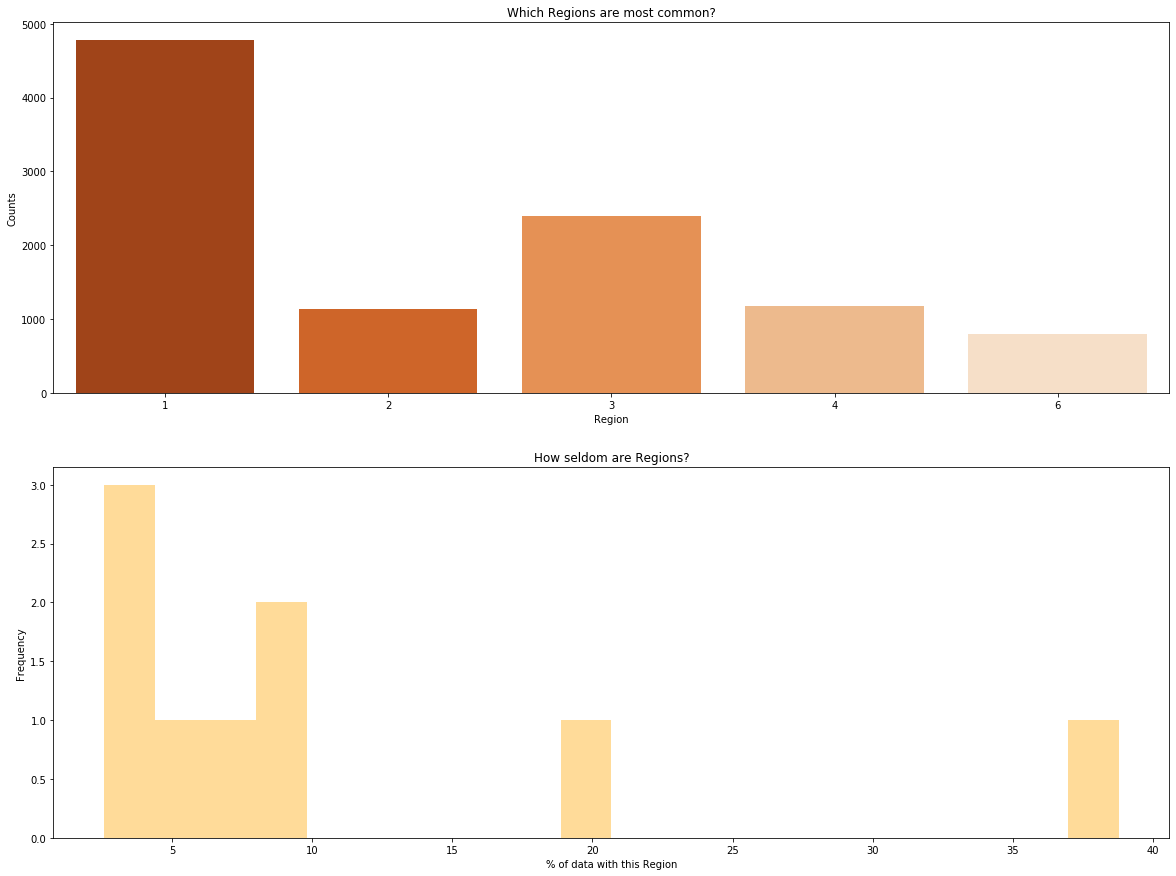

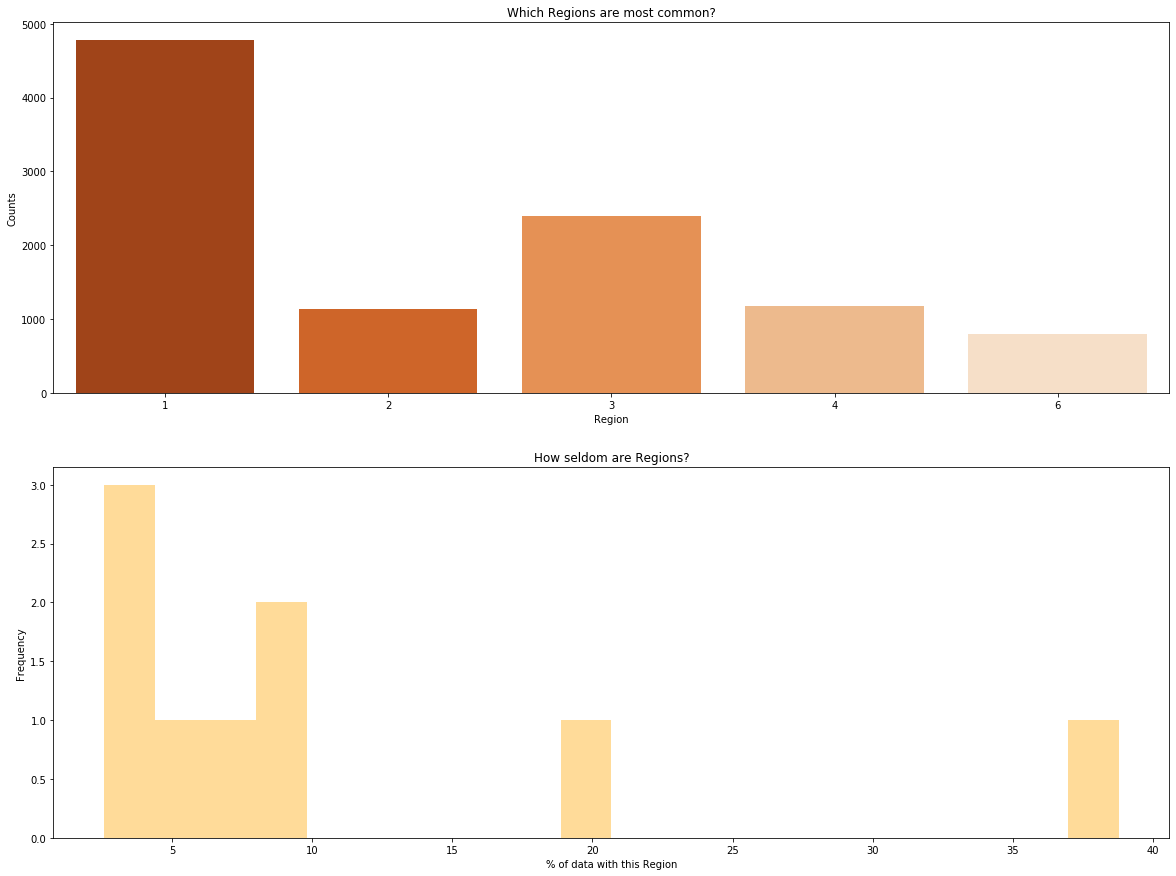

In [160]:

Region_Counts = data.Region.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(Region_Counts.iloc[0:5].index,
            Region_Counts.iloc[0:5].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Region")
ax[0].set_title("Which Regions are most common?");
#######
sns.distplot(np.round(Region_Counts/data.shape[0]*100,2),
           kde=False, bins=20, ax=ax[1], color="Orange")
ax[1].set_title("How seldom are Regions?")
ax[1].set_xlabel("% of data with this Region")
ax[1].set_ylabel("Frequency");

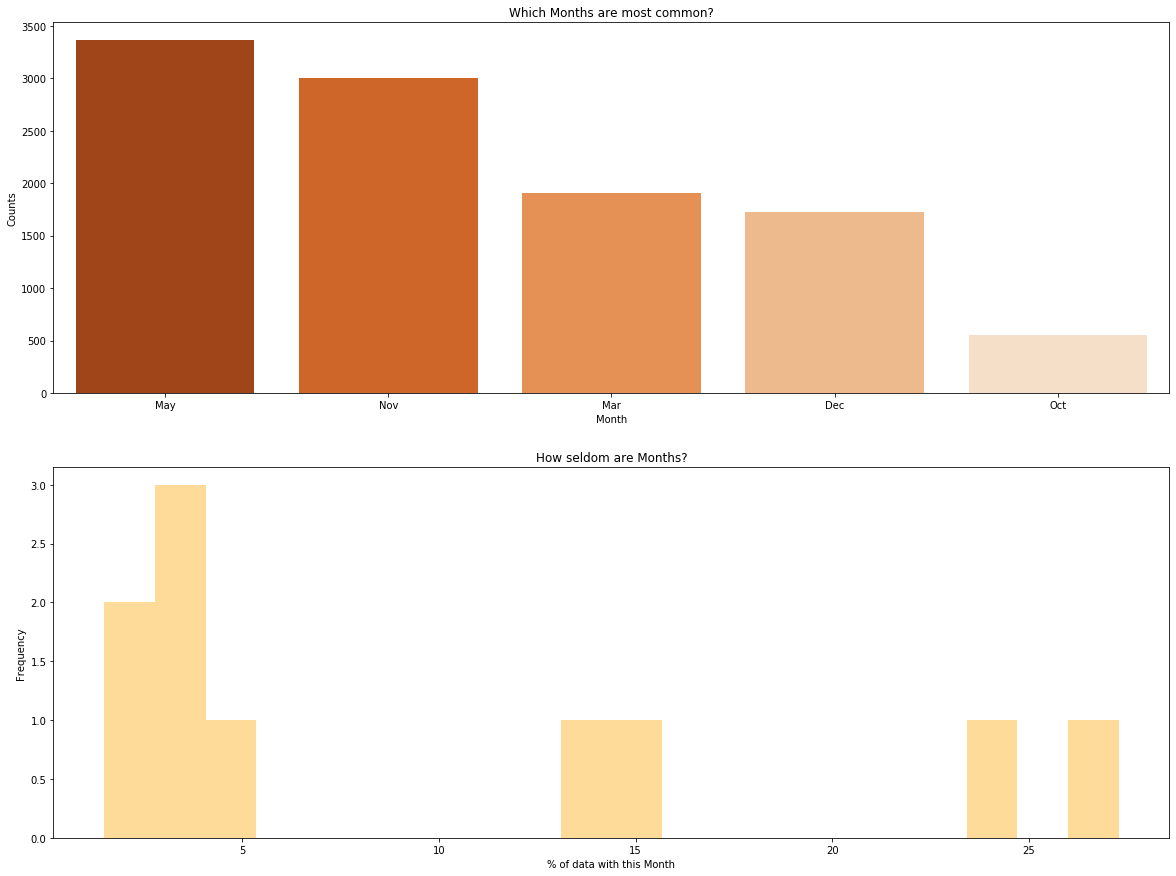

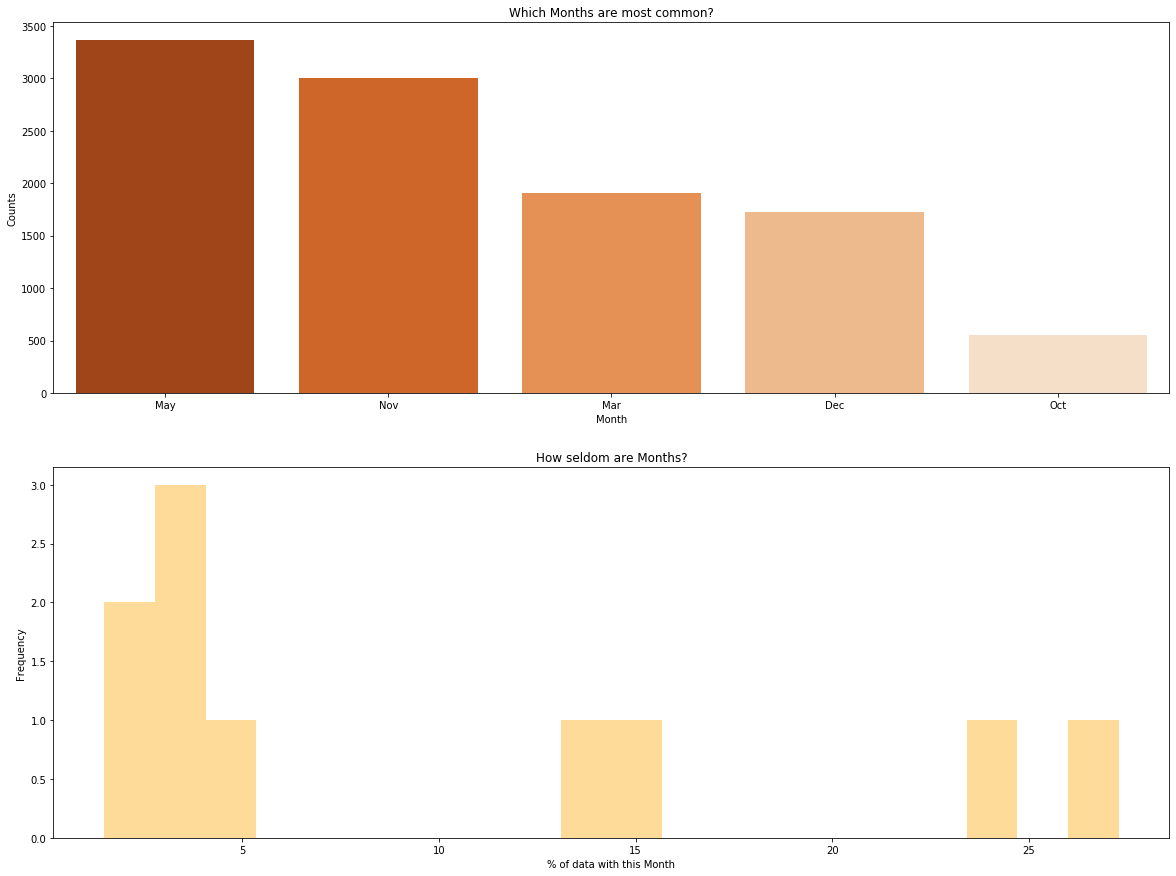

In [161]:

Month_Counts = data.Month.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(Month_Counts.iloc[0:5].index,
            Month_Counts.iloc[0:5].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Month")
ax[0].set_title("Which Months are most common?");
#######
sns.distplot(np.round(Month_Counts/data.shape[0]*100,2),
           kde=False, bins=20, ax=ax[1], color="Orange")
ax[1].set_title("How seldom are Months?")
ax[1].set_xlabel("% of data with this Month")
ax[1].set_ylabel("Frequency");

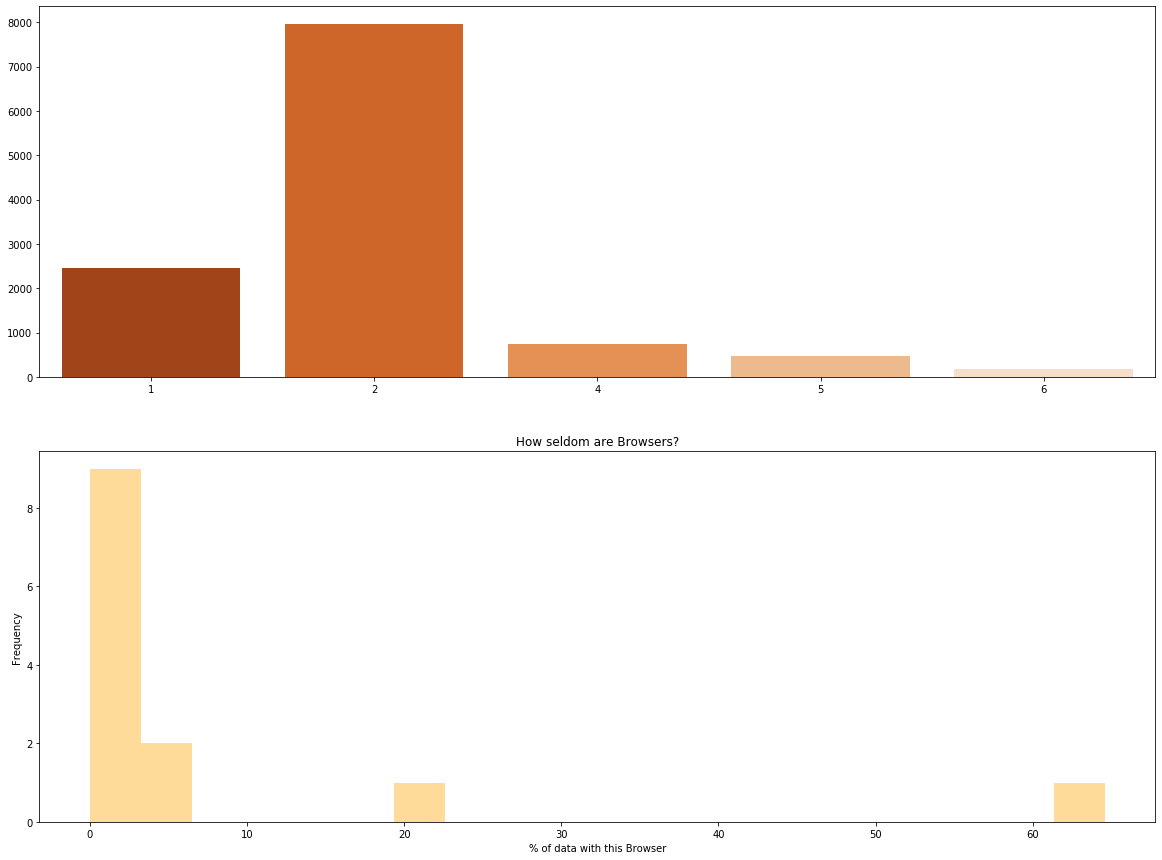

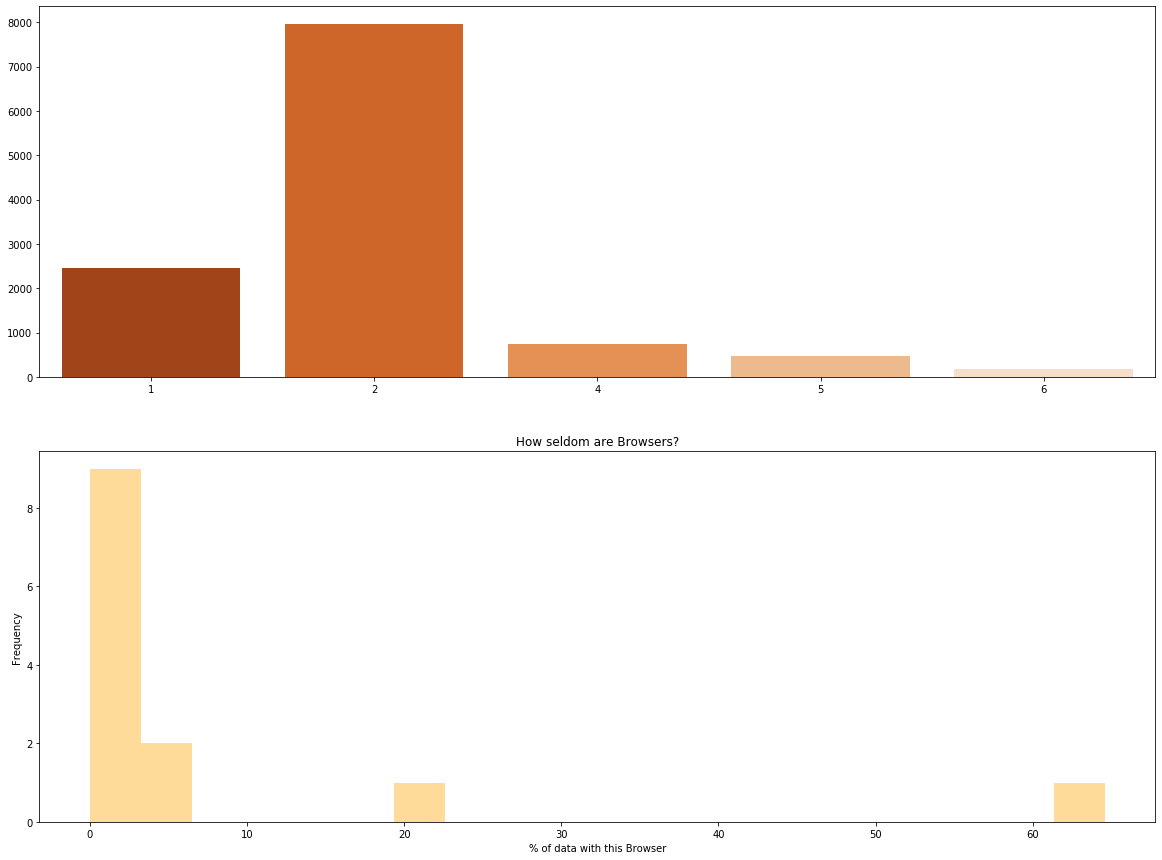

In [162]:

Browser_Counts = data.Browser.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(Browser_Counts.iloc[0:5].index,
            Browser_Counts.iloc[0:5].values,
            ax = ax[0], palette="Oranges_r")

#######
sns.distplot(np.round(Browser_Counts/data.shape[0]*100,2),
           kde=False, bins=20, ax=ax[1], color="Orange")
ax[1].set_title("How seldom are Browsers?")
ax[1].set_xlabel("% of data with this Browser")
ax[1].set_ylabel("Frequency");

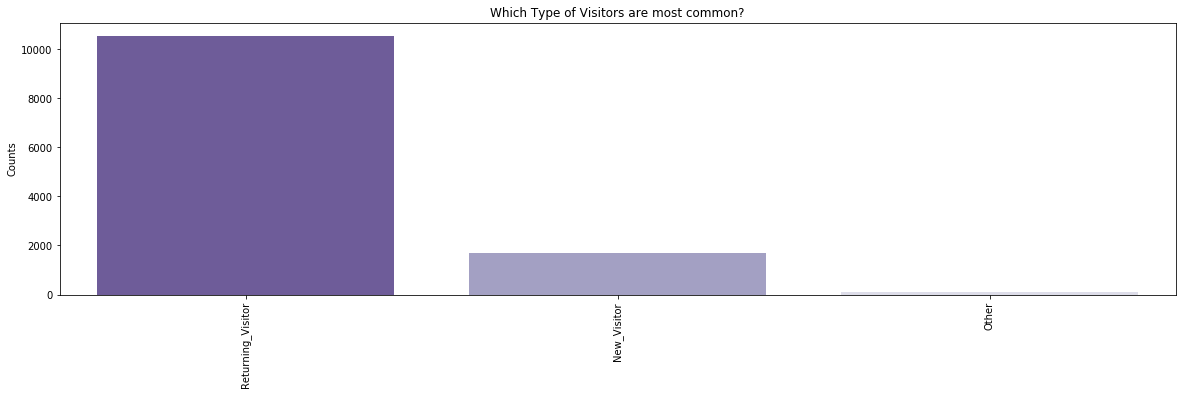

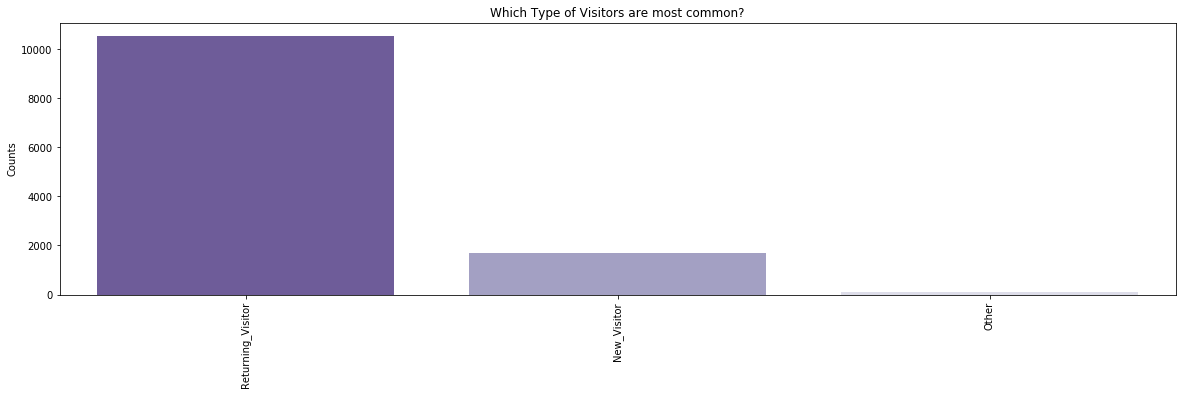

In [163]:
# Which Type of Visitors are most common?
SpecialDay_Counts = data.VisitorType.value_counts().sort_values(ascending=False)

SpecialDay_Counts = data.VisitorType.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(SpecialDay_Counts.index, SpecialDay_Counts.values, palette="Purples_r")

plt.ylabel("Counts")
plt.title("Which Type of Visitors are most common?");
plt.xticks(rotation=90);



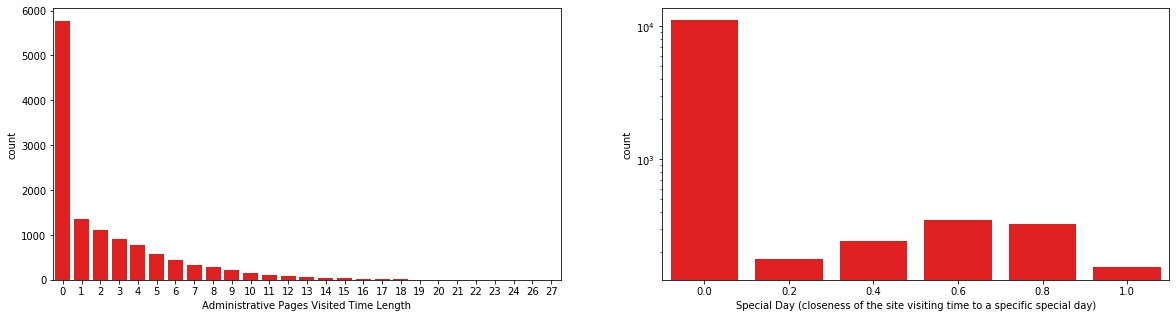

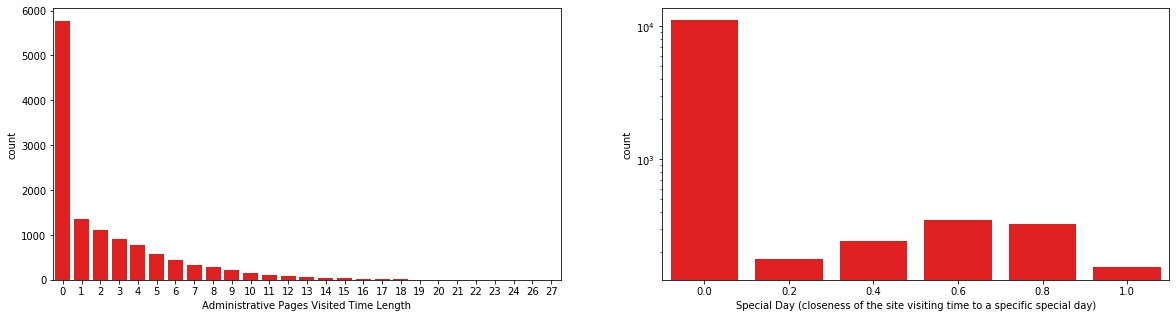

In [164]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data["Administrative"], color="red", ax=ax[0])
sns.countplot(data["SpecialDay"], color="red", ax=ax[1])

ax[1].set_yscale("log")

ax[0].set_xlabel("Administrative Pages Visited Time Length")
ax[1].set_xlabel("Special Day (closeness of the site visiting time to a specific special day)");
# almost all Descriptions do not have lowercase chars
# 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

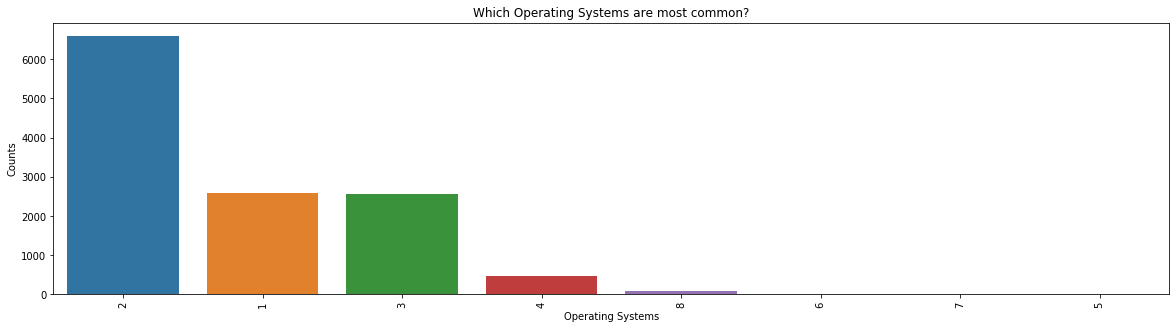

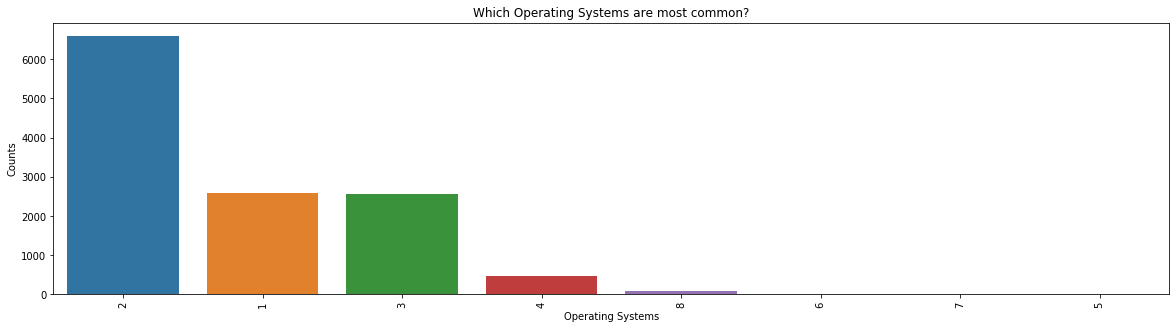

In [165]:
#Which customers are most common?
OS_counts = data.OperatingSystems.value_counts().sort_values(ascending=False).iloc[0:15] 
plt.figure(figsize=(20,5))
sns.barplot(OS_counts.index, OS_counts.values, order=OS_counts.index)
plt.ylabel("Counts")
plt.xlabel("Operating Systems")
plt.title("Which Operating Systems are most common?");

plt.xticks(rotation=90);

In [167]:
# Administrative mean is 2.3, more than 75% is 4, max is 27
data.loc[data.Administrative > 4]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
62,12,279.416667,0,0.00,42,1553.583333,0.009000,0.019667,38.308493,0.0,Feb,1,1,3,2,Returning_Visitor,False,False
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
109,6,326.250000,4,94.00,128,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
134,6,111.500000,0,0.00,26,449.027778,0.000000,0.018519,0.000000,0.6,Feb,1,1,3,3,Returning_Visitor,False,False
174,5,41.300000,0,0.00,24,446.927778,0.000000,0.008602,0.000000,1.0,Feb,2,2,8,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,5,181.866667,0,0.00,192,4845.989214,0.005412,0.022099,18.675649,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12285,6,369.333333,2,225.50,133,3918.363736,0.000000,0.009275,7.147604,0.0,Nov,2,2,2,2,Returning_Visitor,False,False
12287,8,167.910714,6,547.75,111,6340.152381,0.003361,0.009432,44.219794,0.0,Dec,3,2,6,2,Returning_Visitor,False,False
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
62,12,279.416667,0,0.00,42,1553.583333,0.009000,0.019667,38.308493,0.0,Feb,1,1,3,2,Returning_Visitor,False,False
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
109,6,326.250000,4,94.00,128,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
134,6,111.500000,0,0.00,26,449.027778,0.000000,0.018519,0.000000,0.6,Feb,1,1,3,3,Returning_Visitor,False,False
174,5,41.300000,0,0.00,24,446.927778,0.000000,0.008602,0.000000,1.0,Feb,2,2,8,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,5,181.866667,0,0.00,192,4845.989214,0.005412,0.022099,18.675649,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12285,6,369.333333,2,225.50,133,3918.363736,0.000000,0.009275,7.147604,0.0,Nov,2,2,2,2,Returning_Visitor,False,False
12287,8,167.910714,6,547.75,111,6340.152381,0.003361,0.009432,44.219794,0.0,Dec,3,2,6,2,Returning_Visitor,False,False
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


In [ ]:
# to drop the other outlier rows
#data= data.loc[data.Administrative <= 4].copy()


## 3. Exploratory Data Analysis

Correlations
Correlation Matrix- let's you see correlations between all variables. Within seconds, you can see whether something is positivly or negativly correlated with our predictor (target)

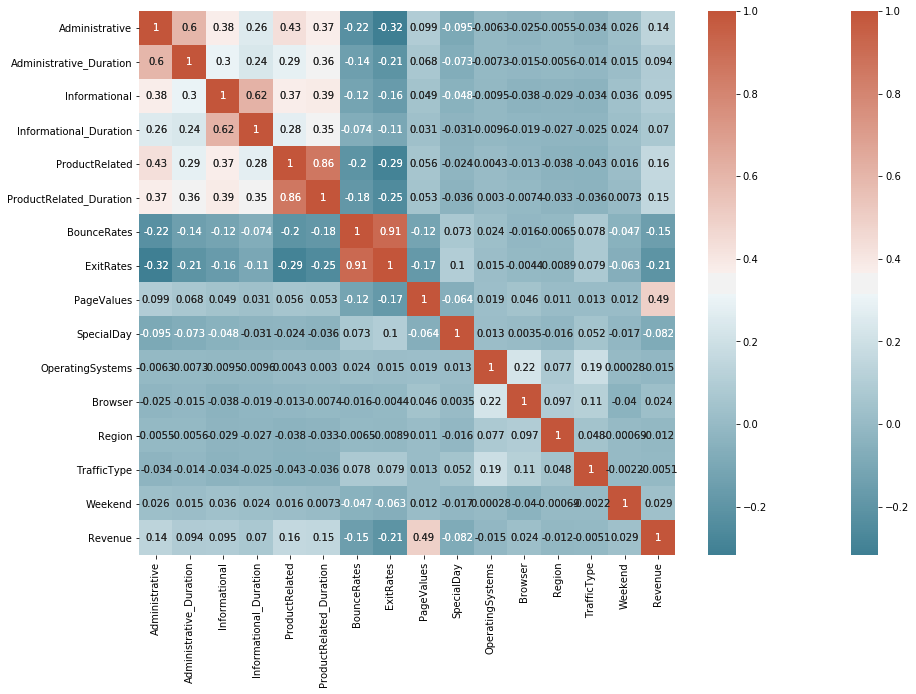

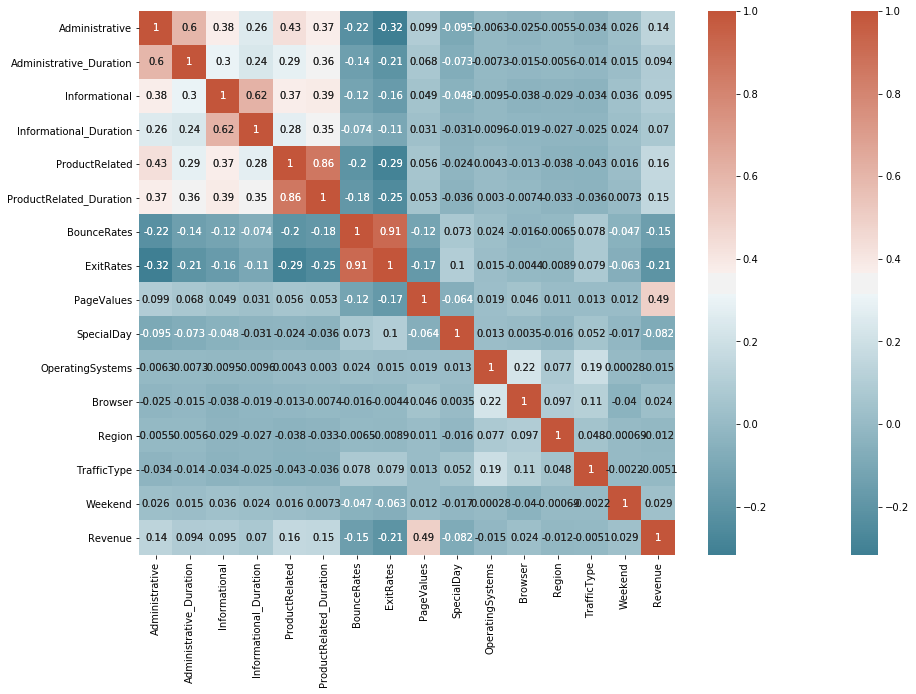

In [168]:
# calculate correlation matrix

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can see there is a positive correlation between Revenue and pageValues. This makes sense since, The greater amount of Revenue, the more pages someone visted. We also see strong positve correations between the type of pages visited & its duration, for example: Administrative & Administrative Duration, Informational & Informational Duration, Product Related & Product Related Duration

Pairplots are also a great way to immediatly see the correlations between all variables. But you will see me make it with only continous columns from our data, because with so many features, it can be difficult to see each one. So instead I will make a pairplot with only our continous features.

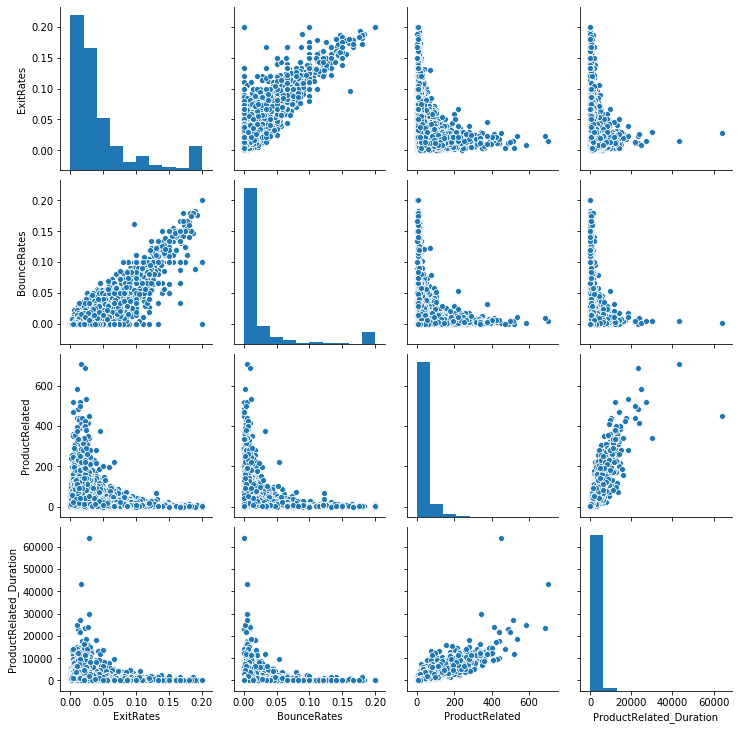

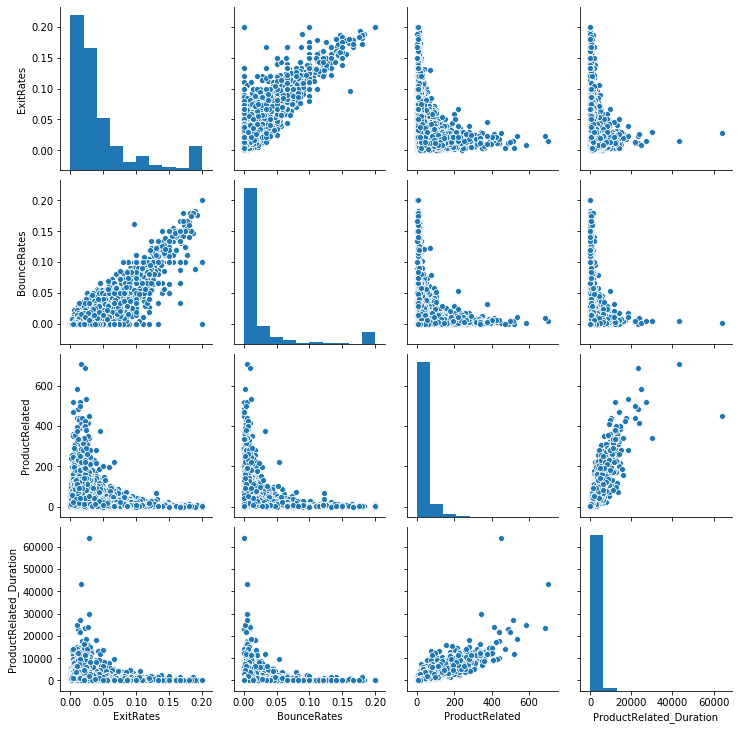

In [169]:
subData = data[['ExitRates','BounceRates','ProductRelated','ProductRelated_Duration']]
sns.pairplot(subData)

Chose to make a smaller pairplot with only the continus variables, to dive deeper into the relationships. Also a great way to see if theirs a positve or negative correlation!

From the Catplot below, its evident that weekends have a lower bounce rate. 
Perhaps it would be a better idea to target users on the Weekend more, since our goal is to have a lower bounce rate, with maximized revenue.

Text(29.970625, 0.5, 'Bounce Rates')

Text(29.970625, 0.5, 'Bounce Rates')

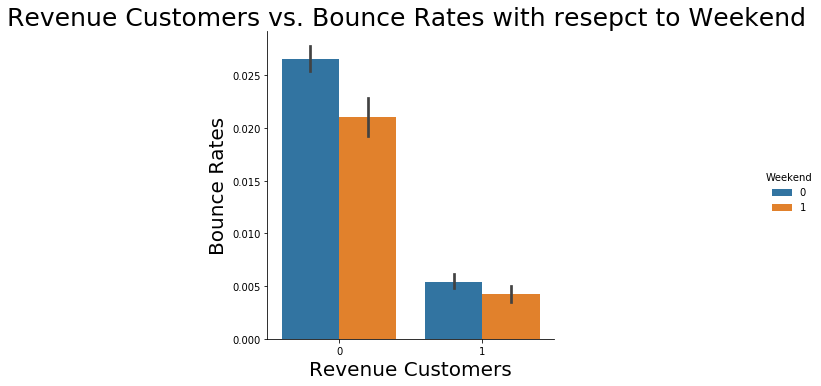

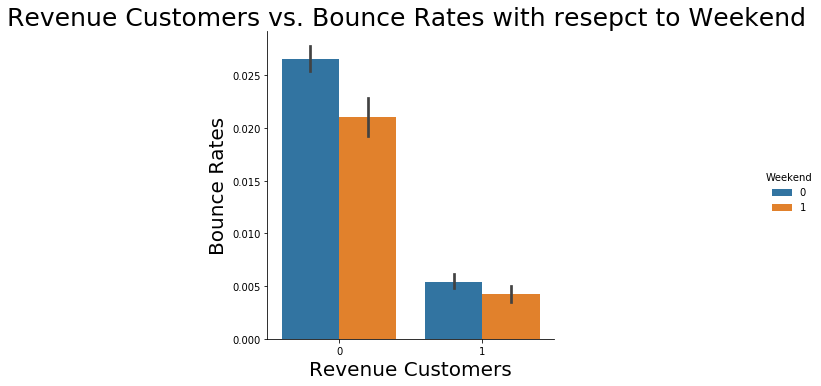

In [194]:
sns.catplot(x="Revenue", y="BounceRates", hue="Weekend", kind="bar", data=data);

plt.title('Revenue Customers vs. Bounce Rates with resepct to Weekend ',size=25)
plt.xlabel('Revenue Customers',size=20)
plt.ylabel('Bounce Rates',size=20)

Violin & Box Plots

The advantages of showing the Box & Violin plots is that it showsthe basic statistics of the data, as well as its distribution. These plots are often used to compare the distribution of a given variable across some categories. It shows the median, IQR, & Tukey’s fence. (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). In addition it can provide us with outliers in our data.


Text(0, 0.5, 'Region')

Text(0, 0.5, 'Region')

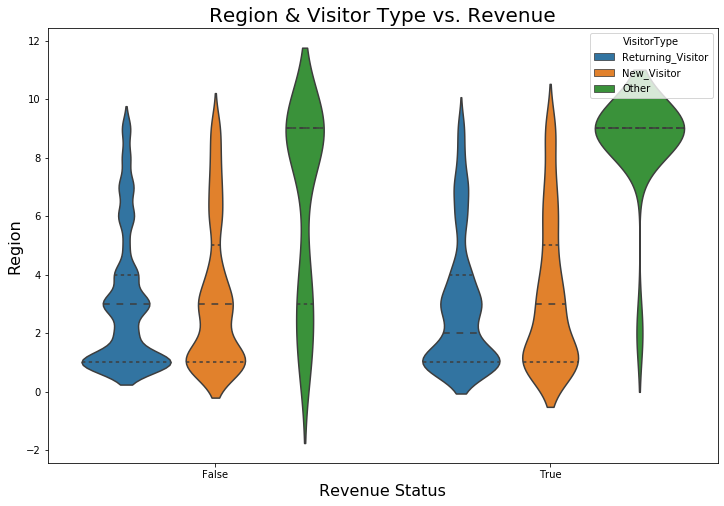

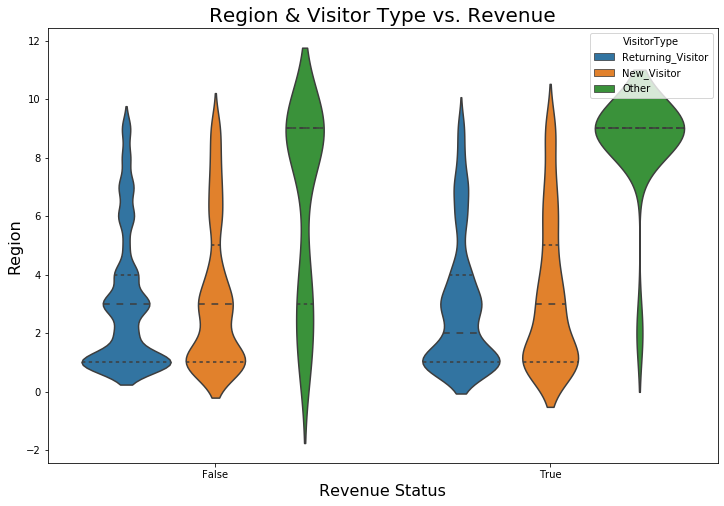

In [173]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Revenue', y= 'Region',hue="VisitorType", inner='quartile',data= data )
plt.title("Region & Visitor Type vs. Revenue",fontsize=20)
plt.xlabel("Revenue Status", fontsize=16)
plt.ylabel("Region", fontsize=16)

From above we can evidently see that returning visitors have a higher region for non revenue customers.  In general, the Revenue & No Revenue status generate similar quartiles.

Text(0, 0.5, 'Operating Systems')

Text(0, 0.5, 'Operating Systems')

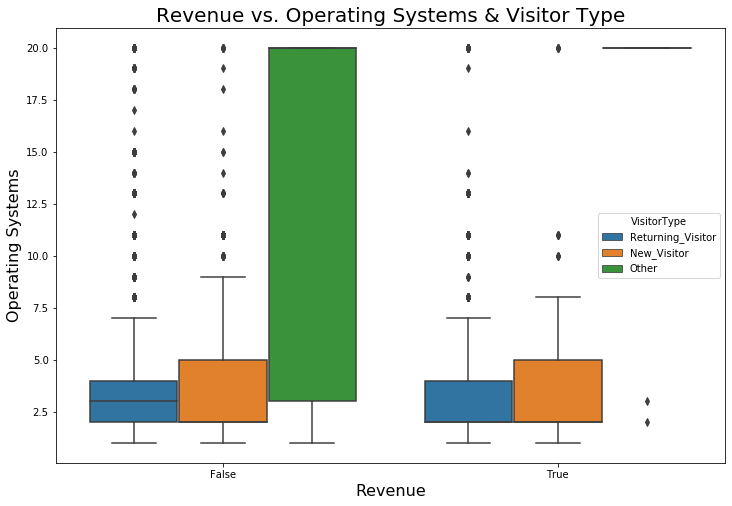

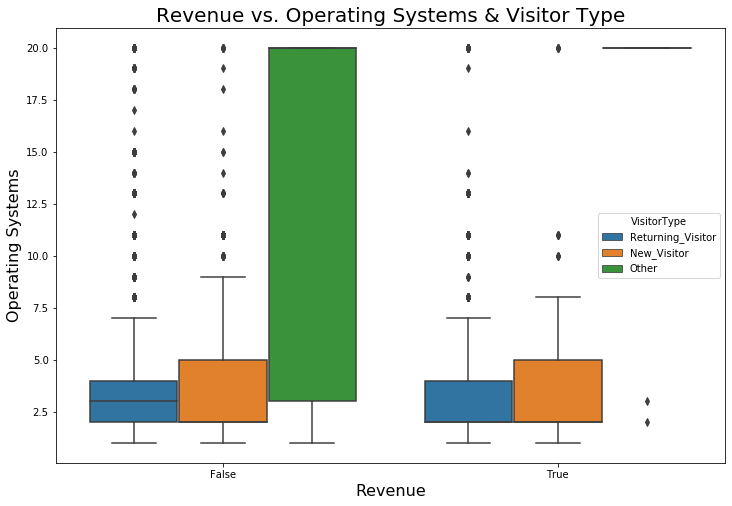

In [174]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Revenue', y= 'TrafficType',hue="VisitorType", data=data )
plt.title("Revenue vs. Operating Systems & Visitor Type", fontsize=20)
plt.xlabel("Revenue",fontsize=16)
plt.ylabel("Operating Systems", fontsize=16)

Above, we can see that there is a wide Traffic type range of "Other" Visitor types for when theirs no revenue generated. In both the Revenue & No Revenue, we can evidently see that new vistors in both have a greater traffic type range. 

# Regression Joint Plot¶


Text(0.5, 1, 'Exit Rates vs. Bounce Rates')

Text(0.5, 1, 'Exit Rates vs. Bounce Rates')

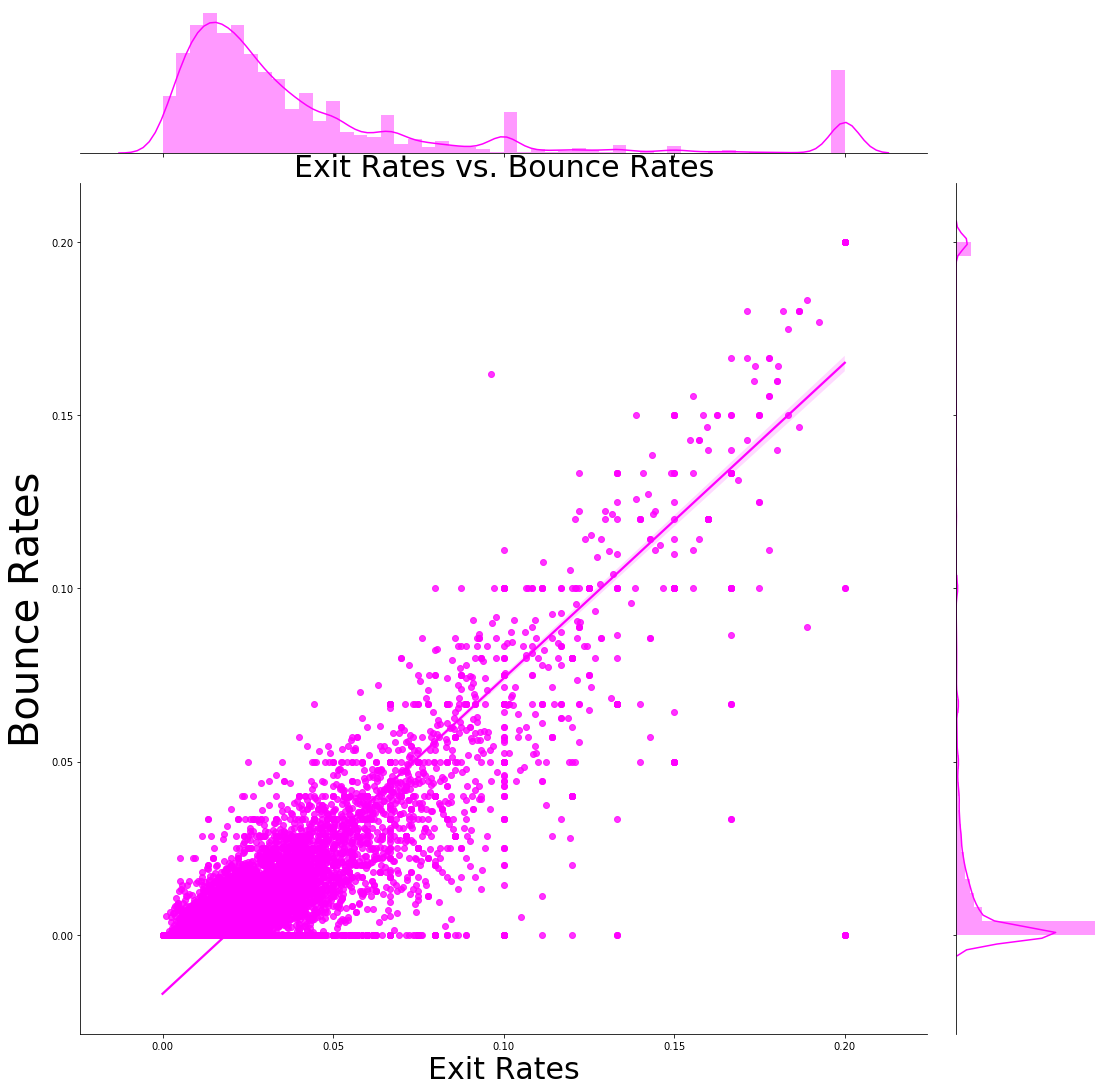

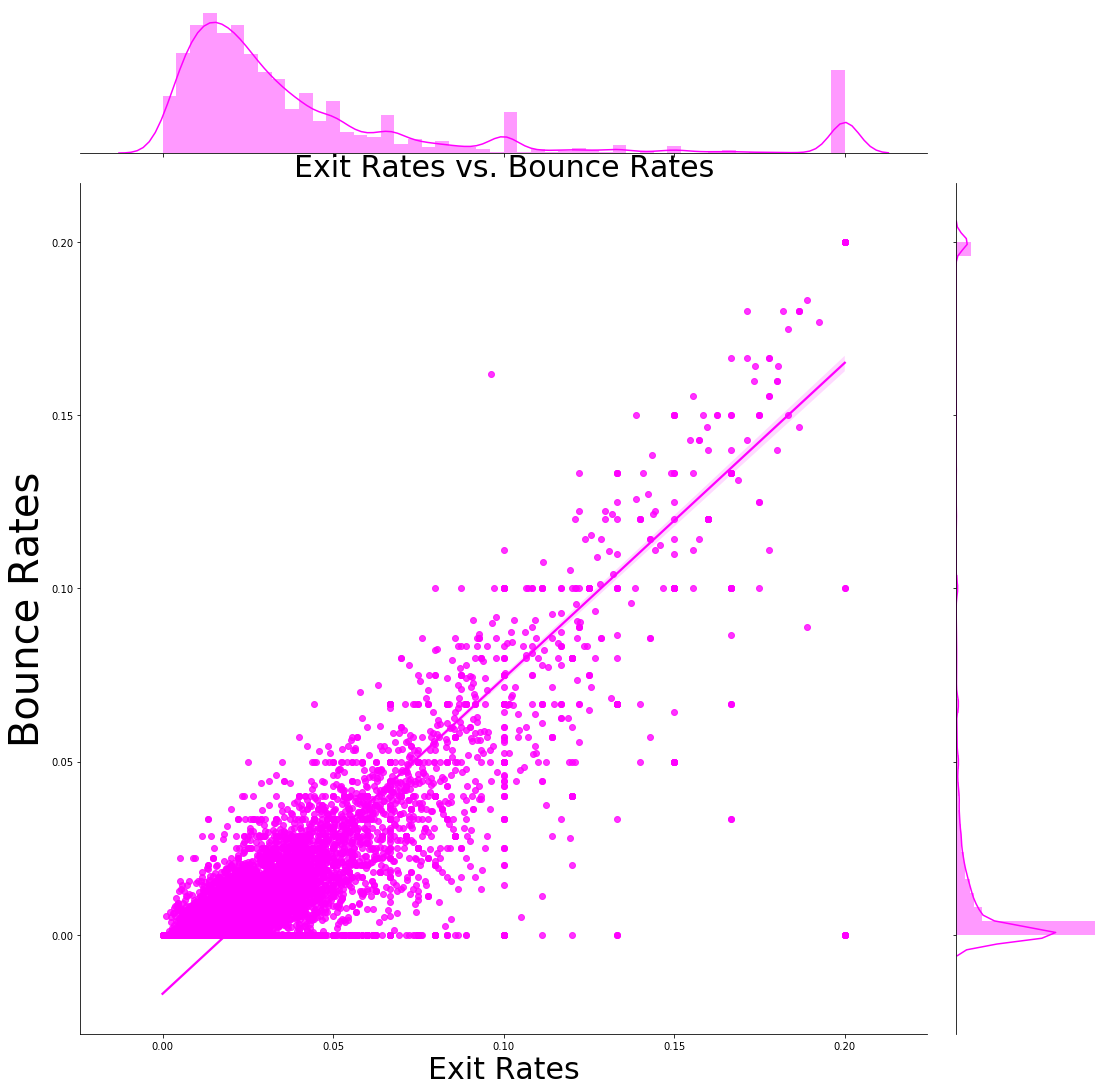

In [175]:
g = sns.jointplot(x= 'ExitRates',y= 'BounceRates', data=data,
             kind = 'reg',height=15,color='magenta')

plt.xlabel('Exit Rates',size=30)
plt.ylabel('Bounce Rates',size=40)
plt.title('Exit Rates vs. Bounce Rates',size=30)

From interpreting the Regression Join plot above, we can see a STRONG POSITIVE correlation between  & fixed acidity. According to the HeatMap, these two features have a correlation coefficent of +0.91!

Text(31.205937500000005, 0.5, 'Bounce Rates')

Text(31.205937500000005, 0.5, 'Bounce Rates')

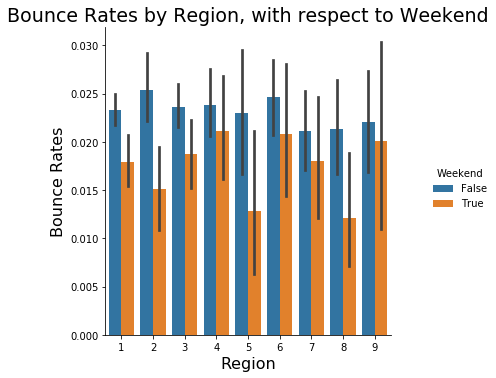

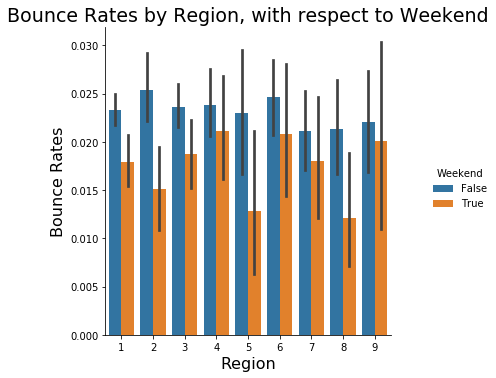

In [176]:
sns.catplot(x="Region", y="BounceRates", hue="Weekend", kind="bar", data=data);

plt.title('Bounce Rates by Region, with respect to Weekend',size=19)
plt.xlabel('Region',size=16)
plt.ylabel('Bounce Rates',size=16)

This plot illustrates that higher Bounce Rate levels are yielded on Weekdays. In region 9, weekends & weekdays are indifferent in terms of bounce rates. 

# Filtering data by Customer revenue Status

In [177]:
# Filtering data by True Revenue Customers 
pos_data = data[data['Revenue']==True]
pos_data.describe().mean()

Administrative              243.515517
Administrative_Duration     564.849747
Informational               240.413417
Informational_Duration      490.487153
ProductRelated              331.184692
ProductRelated_Duration    4628.013406
BounceRates                 238.527969
ExitRates                   238.535817
PageValues                  298.939654
SpecialDay                  238.643336
OperatingSystems            240.752818
Browser                     241.543799
Region                      241.311182
TrafficType                 243.126079
dtype: float64

Administrative              243.515517
Administrative_Duration     564.849747
Informational               240.413417
Informational_Duration      490.487153
ProductRelated              331.184692
ProductRelated_Duration    4628.013406
BounceRates                 238.527969
ExitRates                   238.535817
PageValues                  298.939654
SpecialDay                  238.643336
OperatingSystems            240.752818
Browser                     241.543799
Region                      241.311182
TrafficType                 243.126079
dtype: float64

In [178]:
# Filtering data by False Revenue Customers 
neg_data = data[data['Revenue']==False]
neg_data.describe().mean()

Administrative             1307.165027
Administrative_Duration    1768.563510
Informational              1305.957927
Informational_Duration     1641.940068
ProductRelated             1406.682420
ProductRelated_Duration    9907.789308
BounceRates                1302.787681
ExitRates                  1302.799573
PageValues                 1334.975876
SpecialDay                 1302.909686
OperatingSystems           1305.129695
Browser                    1305.752658
Region                     1305.694971
TrafficType                1307.388827
dtype: float64

Administrative             1307.165027
Administrative_Duration    1768.563510
Informational              1305.957927
Informational_Duration     1641.940068
ProductRelated             1406.682420
ProductRelated_Duration    9907.789308
BounceRates                1302.787681
ExitRates                  1302.799573
PageValues                 1334.975876
SpecialDay                 1302.909686
OperatingSystems           1305.129695
Browser                    1305.752658
Region                     1305.694971
TrafficType                1307.388827
dtype: float64

To recal: SpecialDay, is the feature that indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8 ")

Hence from below, its clear that Revenue Customers have a smaller SpecialDay Score, indicating they buy the product closer to the holiday.



In [179]:
print("(Revenue Customers SpecialDay): " + str(pos_data['SpecialDay'].describe().mean()))
print("(Non-Revenue Customers SpecialDay): " + str(neg_data['SpecialDay'].describe().mean()))

(Revenue Customers SpecialDay): 238.6433358661677
(Non-Revenue Customers SpecialDay): 1302.9096857481748
(Revenue Customers SpecialDay): 238.6433358661677
(Non-Revenue Customers SpecialDay): 1302.9096857481748


# 4. Machine Learning + Predictive Analytics


Prepare Data for Modeling
To prepare data for modeling, just remember ASN (Assign, Split, Normalize).
Assign the 11 features to X, & the last column to our predictor, y

In [181]:
#Prepare Data for Modeling

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Month'] = labelencoder.fit_transform(data['Month'])
data['VisitorType'] = labelencoder.fit_transform(data['VisitorType'])
data['Weekend'] = labelencoder.fit_transform(data['Weekend'])
data['Revenue'] = labelencoder.fit_transform(data['Revenue'])




#Assign the 13 features to X, & the last column to our classification predictor, y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


# Encoding Categorical (Either/Both X or Y) (Optional)



Machine learning models require all input and output variables to be numeric.
This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.
The two most popular techniques are an Ordinal Encoding and a One-Hot Encoding.
Encoding is a required pre-processing step when working with categorical data for machine learning algorithms.
How to use ordinal encoding for categorical variables that have a natural rank ordering.
How to use one-hot encoding for categorical variables that do not have a natural rank ordering.


Split: the dataset into the Training set and Test set


In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modeling /Training



We will now Train various Classification Models on the Training set & see which yields the highest accuracy. We will compare the accuracy of Logistic Regression, K-NN, SVM, Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost. Note: these are all supervised learning models.

Model 1: Logistic Regression


In [185]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2115
           1       0.72      0.37      0.49       351

    accuracy                           0.89      2466
   macro avg       0.81      0.67      0.72      2466
weighted avg       0.88      0.89      0.88      2466

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2115
           1       0.72      0.37      0.49       351

    accuracy                           0.89      2466
   macro avg       0.81      0.67      0.72      2466
weighted avg       0.88      0.89      0.88      2466



Model 2: K-NN (K-Nearest Neighbors)


In [186]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2115
           1       0.68      0.42      0.52       351

    accuracy                           0.89      2466
   macro avg       0.80      0.70      0.73      2466
weighted avg       0.88      0.89      0.88      2466

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2115
           1       0.68      0.42      0.52       351

    accuracy                           0.89      2466
   macro avg       0.80      0.70      0.73      2466
weighted avg       0.88      0.89      0.88      2466



Model 3: SVM (Support Vector Machine)


In [187]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2115
           1       0.72      0.46      0.56       351

    accuracy                           0.90      2466
   macro avg       0.82      0.71      0.75      2466
weighted avg       0.89      0.90      0.89      2466

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2115
           1       0.72      0.46      0.56       351

    accuracy                           0.90      2466
   macro avg       0.82      0.71      0.75      2466
weighted avg       0.89      0.90      0.89      2466



Model 4: Naives Bayes Classifier


In [188]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2115
           1       0.40      0.71      0.51       351

    accuracy                           0.80      2466
   macro avg       0.67      0.77      0.69      2466
weighted avg       0.87      0.80      0.83      2466

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2115
           1       0.40      0.71      0.51       351

    accuracy                           0.80      2466
   macro avg       0.67      0.77      0.69      2466
weighted avg       0.87      0.80      0.83      2466



Model 5: Decision Trees


In [68]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2115
           1       0.50      0.55      0.52       351

    accuracy                           0.86      2466
   macro avg       0.71      0.73      0.72      2466
weighted avg       0.86      0.86      0.86      2466

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2115
           1       0.50      0.55      0.52       351

    accuracy                           0.86      2466
   macro avg       0.71      0.73      0.72      2466
weighted avg       0.86      0.86      0.86      2466



Model 6: Random Forest


In [2]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

NameError: name 'x_train' is not defined

Model 7: XGBoost


In [79]:
#pip install xgboost

#pip install xgboost
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

# Making the Confusion Matrix



In [84]:
#Making the Confusion Matrix
# 90 % Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[2035   80]
 [ 147  204]]


0.907948094079481

[[2035   80]
 [ 147  204]]


0.907948094079481

2035 is the amount of True Positives in our data, while 204 is the amount of True Negatives.
9 & 3 are the number of errors.
There are 80 type 1 error (False Positives)- You predicted positive and it’s false.
There are 147 type 2 error (False Negatives)- You predicted negative and it’s false.
Hence if we calculate the accuracy its # Correct Predicted/ # Total. In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.
(TP + TN)/(TP + TN + FP + FN). (2035+204)/(2035+204+80+147) = 0.90 = 90% accuracy
Note: A good rule of thumb is that any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!


# Feature Importance


Feature Importance provides a score that indicates how helpful each feature was in our model.
The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

In [86]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04343
Feature: 1, Score: 0.05690
Feature: 2, Score: 0.01603
Feature: 3, Score: 0.02652
Feature: 4, Score: 0.07404
Feature: 5, Score: 0.08830
Feature: 6, Score: 0.05704
Feature: 7, Score: 0.08952
Feature: 8, Score: 0.38265
Feature: 9, Score: 0.00327
Feature: 10, Score: 0.04250
Feature: 11, Score: 0.01797
Feature: 12, Score: 0.01973
Feature: 13, Score: 0.02971
Feature: 14, Score: 0.03131
Feature: 15, Score: 0.01114
Feature: 16, Score: 0.00996
Feature: 0, Score: 0.04343
Feature: 1, Score: 0.05690
Feature: 2, Score: 0.01603
Feature: 3, Score: 0.02652
Feature: 4, Score: 0.07404
Feature: 5, Score: 0.08830
Feature: 6, Score: 0.05704
Feature: 7, Score: 0.08952
Feature: 8, Score: 0.38265
Feature: 9, Score: 0.00327
Feature: 10, Score: 0.04250
Feature: 11, Score: 0.01797
Feature: 12, Score: 0.01973
Feature: 13, Score: 0.02971
Feature: 14, Score: 0.03131
Feature: 15, Score: 0.01114
Feature: 16, Score: 0.00996


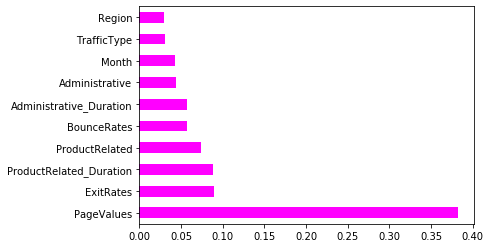

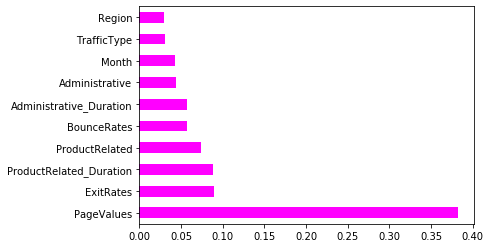

In [107]:
index= data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(10).plot(kind='barh', colormap='spring')

From the Feature Importance graph above, we can conclude that the top 4 significant features were PageValues, ExitRates, ProductRelated_Duration, & ProductRelated.

In [1]:
valuess =  [[3.39, 119.48, 0.78,
             57.61, 48.21, 1876.20, 0.0052,
           0.019, 27.26, 0.023, 5.60, 2.09, 2.45,
             3.08, 4.02, 1.54, 0.26]]
print(model6.predict(sc.transform(valuess)))

NameError: name 'model6' is not defined

In [ ]:
#Outputs Binary 1 -> meaning Revenue Generated for the customer


Predicting the Test set results:
First value represents our predicted value, Second value represents our actual value.
If the values match, then we predicted correctly.

In [140]:
y_pred = model6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


We can see that our results are very accurate (90%) !


Conclusions
1. Out of the 17 features we examined, the top 4 significant features that helped us classify between a Customer that generates revenue & no revenue were PageValues, ExitRates, ProductRelated_Duration, & ProductRelated.
2. Our machine learning algorithm can now classify customers that generate Revenue. Now we can properly help target customers that generate revenue with better deals & promotions.
3. Our Random Forest algorithm yields the highest accuracy, 90%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremely high, it may be too good to be true (an example of Over fitting). Thus, 80% is the ideal accuracy!
Here is access to the data set & code from my GitHub page:




Recommendations & comments are welcomed!

---
Acknowledgements

SOURCE:Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [https://doi.org/10.1007/s00521-018-3523-0]


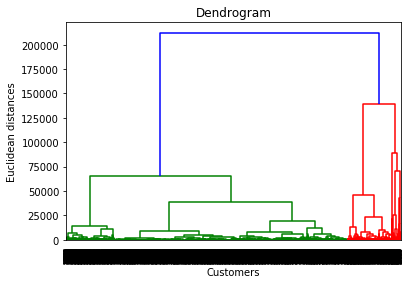

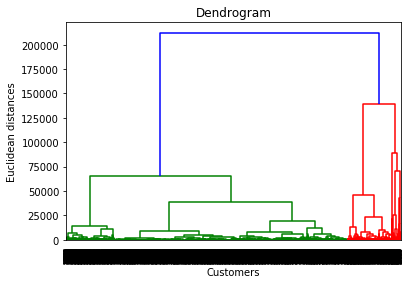

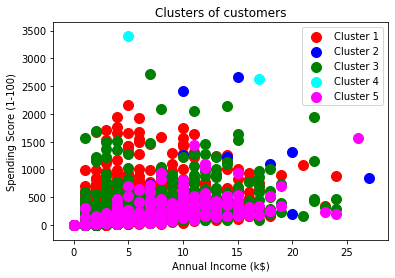

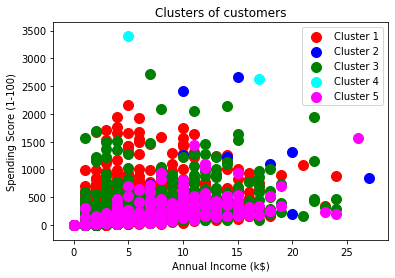

In [148]:
X = data.iloc[:, :-1].values

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

array([[ 0.,  0.,  0., ...,  1.,  2.,  0.],
       [ 0.,  0.,  0., ...,  2.,  2.,  0.],
       [ 0.,  0.,  0., ...,  3.,  2.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 13.,  2.,  1.],
       [ 4., 75.,  0., ..., 11.,  2.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  1.]])

array([[ 0.,  0.,  0., ...,  1.,  2.,  0.],
       [ 0.,  0.,  0., ...,  2.,  2.,  0.],
       [ 0.,  0.,  0., ...,  3.,  2.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 13.,  2.,  1.],
       [ 4., 75.,  0., ..., 11.,  2.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  1.]])